In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
from google.colab import userdata
api_key = userdata.get('cos_api_key')

In [3]:
import pandas as pd
exchange = pd.read_csv('/content/exchange_2000_2024.csv')

In [62]:
exchange.columns

Index(['TIME', '원/달러환율', '한국 장기 시장 금리', '미국 장기 시장 금리', '중국 장기 시장 금리',
       '한국 단기 시장 금리', '미국 단기 시장 금리', '중국 단기 시장 금리', '전체 수출 총액', '미국 수출 총액',
       '중국 수출 총액', '전체 수입 총액', '미국 수입 총액', '중국 수입 총액', '소득 교역 조건 지수',
       '해외 직접 투자 금액', '경제 심리 지수', '한국 기준 금리', '미국 기준 금리', '중국 기준 금리',
       '한국 소비자 물가지수', '미국 소비자 물가지수', '중국 소비자 물가지수', '한국 외환 보유액', '미국 외환 보유액',
       '중국 외환 보유액', '한국 산업 생산 지수', '미국 산업 생산 지수', '한국 실업률', '미국 실업률',
       '한국 주가지수', '미국 주가지수', '중국 주가지수', 'WTI 유가', '두바이 유가', 'Brent 유가',
       '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격', '아연 가격',
       '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격', '외국인 투자 금액',
       '한국 경상수지', '미국 경상수지', '중국 경상수지', '한국 상품수지', '미국 상품수지', '중국 상품수지',
       '한국 경제성장률', '미국 경제성장률', '중국 경제성장률', '한국 GDP', '미국 GDP', '중국 GDP',
       '한국 GDP 디플레이터', '한국 중앙정부 부채 비율', '미국 중앙정부 부채 비율'],
      dtype='object')

## **[가설1] 경제심리지수가 낮을수록 원/달러 환율은 상승한다**

- 귀무가설 (H₀)

  : 경제심리지수가 낮아질수록 원/달러 환율은 오히려 하락하거나 변화 없다.

- 대립가설 (H₁):

  : 경제심리지수가 낮아질수록 원/달러 환율은 상승한다.

- 피어슨 상관계수 검정 / p-value 단측검정

pearsonr()의 p-value는 두 방향(+, -) 다 가능성을 포함해서 계산됨

오직 **음의 방향(ρ < 0)**만 관심 있음

따라서 양측 p-value를 반으로 나눠서,
"음의 방향일 때만 유의한지를 평가"

상관계수: -0.562
단측 p-value: 0.0000


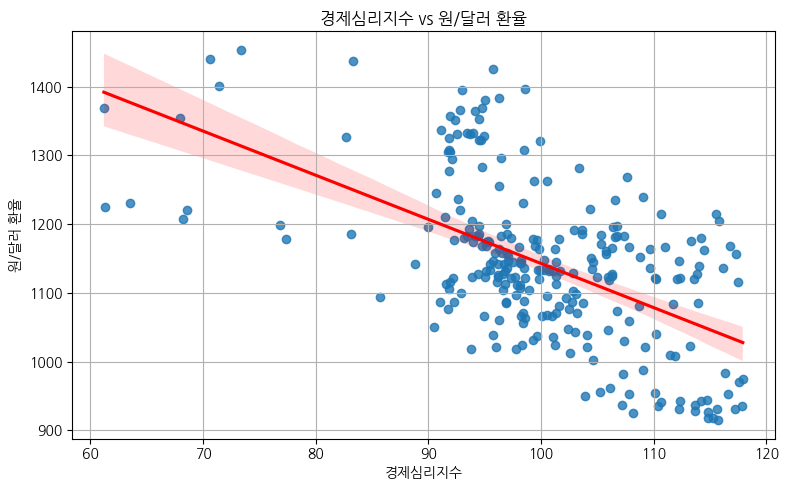

In [4]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 전처리
subset = exchange[['경제 심리 지수', '원/달러환율']].dropna()
x = subset['경제 심리 지수']
y = subset['원/달러환율']

# 2. 피어슨 상관계수 및 단측 p-value 계산
corr, pval_two_tailed = pearsonr(x, y)

# 방향: 경제심리 ↓ → 환율 ↑ (즉, corr < 0 예상)
if corr < 0:
    pval_one_tailed = pval_two_tailed / 2
else:
    pval_one_tailed = 1 - (pval_two_tailed / 2)

print(f"상관계수: {corr:.3f}")
print(f"단측 p-value: {pval_one_tailed:.4f}")

# 3. 산점도 + 회귀선 시각화
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("경제심리지수 vs 원/달러 환율")
plt.xlabel("경제심리지수")
plt.ylabel("원/달러 환율")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 가설 1: 경제심리지수 vs 원/달러 환율
subset = exchange[['경제 심리 지수', '원/달러환율']].dropna()
x = subset['경제 심리 지수']
y = subset['원/달러환율']

# 피어슨 상관계수 (양측검정)
corr, pval = pearsonr(x, y)
print(f"[가설 1] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

[가설 1] 상관계수: -0.562, 양측 p-value: 0.0000


### [가설 1] 추론통계 결과

- 상관계수:  - 0.562 **강한 음의 상관관계** 존재

- 단측 p-value: 0.00000

  → 강한 음의 상관관계 존재

  → p-value < 0.05로 통계적으로 유의미한 관계 확인됨

► 경제심리지수와 원/달러 환율 간의 상관계수는** -0.562**로,
경제심리가 악화될수록 환율이 상승하는 강한 음의 상관관계가 확인되었다.

또한 **p-value는 0.0000**으로, 해당 관계는 통계적으로도 매우 유의미하였다.
이는 경제 불안 상황에서 안전자산인 달러에 대한 수요가 증가하며,

심리적 요인이 환율 상승의 선행지표로 작용할 수 있음을 시사한다.

## **[가설2] 경제심리지수가 낮을수록 외국인 투자금액은 감소한다.**

- 귀무가설 (H₀)
  : 경제심리지수가 낮아져도 외국인 투자금액은 증가하거나 변화가 없다.

- 대립가설 (H₁)
  : 경제심리지수가 낮아질수록 외국인 투자금액은 감소한다.

- 피어슨 상관계수 검정

In [6]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 추출 및 NaN 제거
subset = exchange[['경제 심리 지수', '외국인 투자 금액']].dropna()
x = subset['경제 심리 지수']
y = subset['외국인 투자 금액']

# 피어슨 상관계수 계산 (기본은 양측검정)
corr, pval_two_tailed = pearsonr(x, y)

# 단측검정용 p-value 계산 (음의 상관계수 가정)
if corr < 0:
    pval_one_tailed = pval_two_tailed / 2
else:
    pval_one_tailed = 1 - (pval_two_tailed / 2)

print(f"상관계수: {corr:.3f}")
print(f"단측 p-value: {pval_one_tailed:.4f}")

상관계수: -0.250
단측 p-value: 0.0000


In [ ]:
# 피어슨 상관계수 (양측검정)
corr, pval = pearsonr(x, y)
print(f"[가설 2] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

[가설 2] 상관계수: -0.250, 양측 p-value: 0.0000


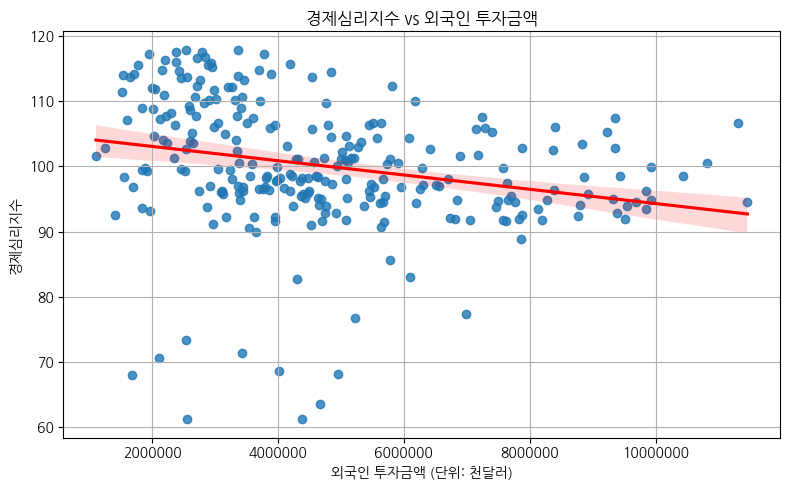

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시: 경제심리지수 vs 외국인 투자금액
subset = exchange[['경제 심리 지수', '외국인 투자 금액']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(x='외국인 투자 금액', y='경제 심리 지수', data=subset, line_kws={"color": "red"})

# 축 단위 일반 표기로 변경
plt.ticklabel_format(style='plain', axis='x')

plt.title("경제심리지수 vs 외국인 투자금액")
plt.xlabel("외국인 투자금액 (단위: 천달러)")  # 단위 명확히
plt.ylabel("경제심리지수")
plt.grid(True)
plt.tight_layout()
plt.show()

→ 피드백 반영 후 단위를 조정해 데이터의 상대적 크기와 패턴을 직관적으로 보여줄 수 있게 됨

### [가설 2] 추론통계 결과

- 상관계수: -0.250

- 단측 p-value: 0.0000

  → 음의 방향으로 약한 상관관계 존재,
  → p-value < 0.05로 통계적으로 유의미한 관계 확인됨

► 경제심리지수와 외국인 투자금액 간의 상관계수는 -0.250으로,

경제심리지수가 높아질수록 외국인 투자금액이 줄어드는 경향이 약하게 나타났다.

단측검정 기준 p-value는 0.0000으로, 해당 관계는 통계적으로 유의미하였다.

이는 경제 심리가 개선될수록 외국인 투자자들의 투자 규모가 다소 줄어드는 흐름이 있다는 것을 의미하며,

단기적으로는 심리가 개선돼도 외국인 자금은 반드시 유입되지 않거나 오히려 이탈하는 시기도 있을 수 있음을 시사한다.

다만, 상관계수의 절댓값이 작기 때문에 해당 관계의 영향력은 제한적이며,

환율, 금리, 정책 요인 등 다른 변수들과의 복합적 영향 분석이 병행될 필요가 있다.

## **[가설2-1] 한미 금리차가 커질수록 외국인 투자금액은 증가할 것이다.**

- 귀무가설 (H₀)

  : 한미 금리차가 커져도 외국인 투자금액은 감소하거나 변화가 없다.

- 대립가설 (H₁)

  : 한미 금리차가 커질수록 외국인 투자금액은 증가한다.

In [8]:
exchange['한미금리차'] = exchange['한국 기준 금리'] - exchange['미국 기준 금리']

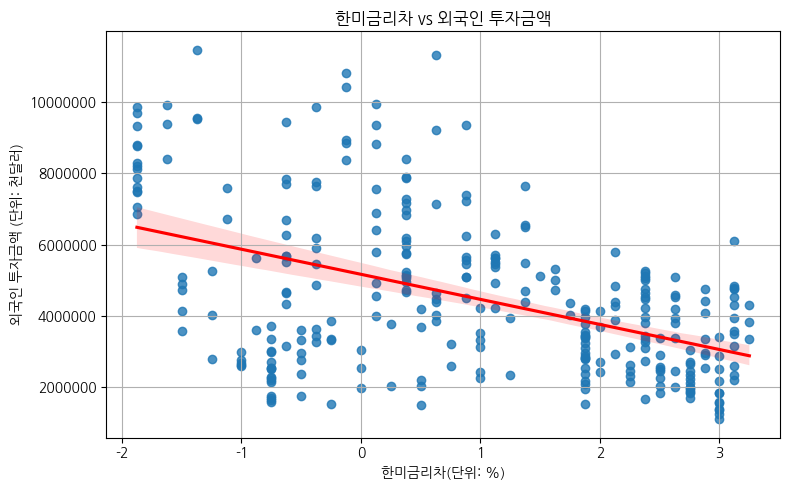

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 변수만 추
subset = exchange[['한미금리차', '외국인 투자 금액']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(x='한미금리차', y='외국인 투자 금액', data=subset, line_kws={"color": "red"})

# 축 단위 일반 숫자로 표시 (지수 형식 제거)
plt.ticklabel_format(style='plain', axis='y')

# 그래프 제목 및 축 이름
plt.title("한미금리차 vs 외국인 투자금액")
plt.xlabel("한미금리차(단위: %)")
plt.ylabel("외국인 투자금액 (단위: 천달러)")

plt.grid(True)
plt.tight_layout()
plt.show()

- 상관계수: -0.475

- 단측 p-value: 1.0000

In [ ]:
# 피어슨 상관계수 + 양측 p-value
from scipy.stats import pearsonr

subset = exchange[['한미금리차', '외국인 투자 금액']].dropna()
x = subset['한미금리차']
y = subset['외국인 투자 금액']

corr, pval = pearsonr(x, y)
print(f"상관계수: {corr:.3f}")
print(f"양측 p-value: {pval:.4f}")

상관계수: -0.475
양측 p-value: 0.0000


### [가설 2-1] 추론통계 결과

한미 금리차와 외국인 투자금액 간의 상관계수는 -0.475로,

두 변수 간에는 중간 정도의 음의 선형관계가 존재하는 것으로 나타났다.

양측검정 기준 p-value는 0.0000으로,

이 관계는 통계적으로 유의미하다.

이는 일반적으로 기대되는 “금리차가 커지면 외국인 자금이 유입된다”는 방향과는 정반대의 흐름을 보이며,
실제 데이터에서는 한미 금리차가 커질수록 외국인 투자금액이 감소하는 경향이 나타났다.

이러한 결과는 최근 몇 년간의 미국 금리 급등기,
환율 변동성 증가, 글로벌 유동성 축소, 리스크 회피적 자금 흐름 등이
단순 금리차보다 더 강하게 작용했을 가능성을 시사한다.

## **[가설2-1 확장] 한미 금리차가 커질수록 원/달러 환율은 하락할 것이다.**

[가설 2-1 확장] 상관계수: -0.085, 양측 p-value: 0.1411


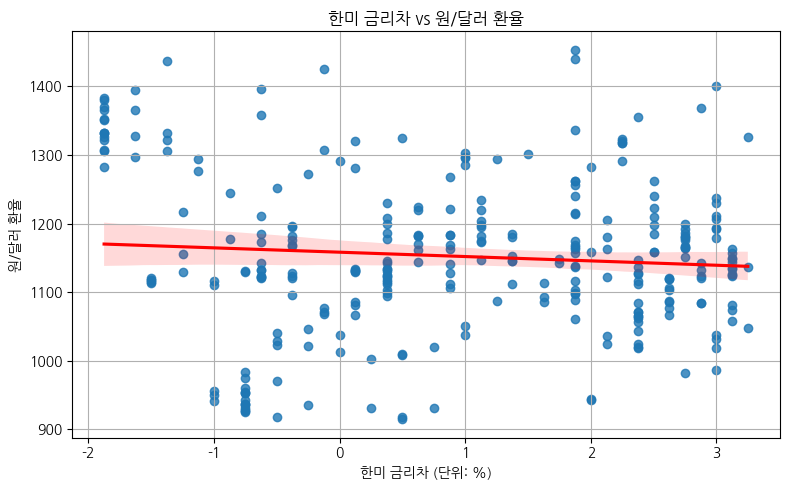

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 필요한 컬럼 정리
subset = exchange[['한미금리차', '원/달러환율']].dropna()
x = subset['한미금리차']
y = subset['원/달러환율']

# 상관계수 계산
corr, pval = pearsonr(x, y)
print(f"[가설 2-1 확장] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

# 시각화
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("한미 금리차 vs 원/달러 환율")
plt.xlabel("한미 금리차 (단위: %)")
plt.ylabel("원/달러 환율")
plt.grid(True)
plt.tight_layout()
plt.show()

### [가설2-1 확장] 추론통계 결과

    - 상관계수	-0.085 → 매우 약한 음의 상관관계

    - p-value	0.1411 → 유의수준 0.05보다 큼 → 통계적으로 유의하지 않음


한미 금리차와 원/달러 환율 간에는 음의 방향(금리차 ↑ → 환율 ↓) 관계가 약하게 나타났지만,

통계적으로 유의하지 않음 (p-value > 0.05).

즉, 금리차만으로 환율을 예측하기 어렵다는 점을 시사함.

환율은 정책, 심리, 수급, 지정학적 요인 등 다양한 요인의 영향을 복합적으로 받기 때문에
단일 변수로 설명이 어려움.

► 한미 금리차와 환율 간에는 약한 음의 상관관계가 나타났으나, 통계적으로 유의하지 않아 명확한 인과를 설명하기 어렵다.
이는 환율이 금리차뿐 아니라 다양한 요인의 영향을 받는 복합 변수임을 시사한다.

## **[가설 3] 경제심리지수는 정책적 이벤트에 영향을 받는다.**

- 귀무가설 (H₀)

  : 정책적 이벤트가 발생하더라도 경제심리지수에는 변화가 없다.

- 대립가설 (H₁)

  :정책적 이벤트가 발생하면 경제심리지수에 유의미한 변화가 생긴다.



- 시각화로는 이미 확인, t-검정(이벤트전후의 평균차이)

In [10]:
import pandas as pd
from scipy.stats import ttest_rel

# 데이터 불러오기 (이미 exchange로 되어 있을 경우 생략)
# exchange = pd.read_csv("파일경로.csv", parse_dates=['날짜'])

# 이벤트 기준 연도와 이름
event_years = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "미국 금리 급등 시작+우크라이나",
    "2023": "한은 금리 고점"
}

# 결과 저장용 리스트
results = []

exchange['TIME'] = pd.to_datetime(exchange['TIME'])

# 이벤트 전후 6개월 비교
for year, label in event_years.items():
    event_date = pd.Timestamp(f"{year}-01-01")

    # 전후 6개월 슬라이싱
    pre = exchange[(exchange['TIME'] >= event_date - pd.DateOffset(months=6)) &
                   (exchange['TIME'] < event_date)]['경제 심리 지수'].dropna()

    post = exchange[(exchange['TIME'] >= event_date) &
                    (exchange['TIME'] < event_date + pd.DateOffset(months=6))]['경제 심리 지수'].dropna()

    # 최소 샘플 수 제한 (예: 최소 6개 이상)
    min_len = min(len(pre), len(post))
    if min_len >= 6:
        # 길이 맞춰서 paired t-test
        t_stat, pval = ttest_rel(pre[:min_len], post[:min_len])
        results.append({
            "이벤트 연도": year,
            "정책 이벤트": label,
            "전 평균": round(pre[:min_len].mean(), 2),
            "후 평균": round(post[:min_len].mean(), 2),
            "t-통계량": round(t_stat, 3),
            "p-value": round(pval, 4)
        })

# 결과 정리
results_df = pd.DataFrame(results)
print(results_df)


  이벤트 연도             정책 이벤트    전 평균    후 평균  t-통계량  p-value
0   2008           글로벌 금융위기  115.50  107.78  4.581   0.0059
1   2015           중국 증시 폭락   97.68  100.07 -1.344   0.2368
2   2016               브렉시트   96.43   94.78  2.120   0.0875
3   2017             트럼프 취임   96.57   99.60 -2.855   0.0356
4   2018            미중 무역전쟁  101.50  100.60  1.820   0.1285
5   2020            코로나 팬데믹   93.63   74.93  2.786   0.0386
6   2022  미국 금리 급등 시작+우크라이나  105.83  105.83 -0.000   1.0000
7   2023           한은 금리 고점   96.12   93.37  1.210   0.2803


이벤트 연도 | 정책 이벤트 | 전후 평균 차이 | p-value | 해석
----------|-----------|-------------|--------|-------
2008 | 글로벌 금융위기 | 115.50 → 107.78 ↓ | 0.0059 | ✅ 심리 급락, 유의미한 변화
2015 | 중국 증시 폭락 | 97.68 → 100.07 ↑ | 0.2368 | ❌ 유의미하지 않음
2016 | 브렉시트 | 96.43 → 94.78 ↓ | 0.0875 | ❌ 유의미하지 않음 (경계선)
2017 | 트럼프 취임 | 96.57 → 99.60 ↑ | 0.0356 | ✅ 유의미한 심리 상승
2018 | 미중 무역전쟁 | 101.50 → 100.60 ↓ | 0.1285 | ❌ 유의미하지 않음
2020 | 코로나 팬데믹 | 93.63 → 74.93 ↓ | 0.0386 | ✅ 유의미한 심리 급락
2022 | 금리 급등+우크라 | 105.83 → 105.83 = | 1.0000 | ❌ 유의미하지 않음
2023 | 한은 금리 고점 | 96.12 → 93.37 ↓ | 0.2803 | ❌ 유의미하지 않음

### [가설 3] 추론통계 결과

경제심리지수에 대해 대응표본 t-검정을 실시한 결과,
일부 주요 정책 이벤트는 통계적으로 유의한 심리 변화를 유발한 것으로 나타났다.

- 2008년 글로벌 금융위기와 2020년 코로나 팬데믹 시기에는
  심리지수가 크게 하락하였고, 이는 통계적으로 유의미한 급락으로 확인되었다.

- 반면, 2017년 트럼프 취임은 경제심리지수가 유의미하게 상승한 유일한 사례였다.

- 그 외 브렉시트(2016), 미중 무역전쟁(2018), 2022년 금리급등기 등은
  심리지수의 일부 변화는 있었으나 통계적으로 유의하지 않은 수준이었다.
<br>

► 결과적으로, 경제심리지수는 모든 정책 이벤트에 민감하게 반응하지는 않지만,

특정 거시 위기 상황에서는 심리 변동성이 명확히 드러나는 유의미한 반응 지표로 기능함을 확인할 수 있다.

## **[가설4] 외환보유액 변화량이 증가할수록 원/달러 환율은 하락할 것이다.**

- 귀무가설 (H₀)
  : 외환보유액 변화량이 증가할수록 원/달러 환율은 증가할 것이다.

- 대립가설 (H₁)
  ; 외환보유액 변화량이 증가할수록 원/달러 환율은 하락할 것이다.



In [11]:
# 외환보유액 변화량 계산
exchange['외환보유액_변화'] = exchange['한국 외환 보유액'].diff()

[가설 4] 상관계수: -0.205, 양측 p-value: 0.0014


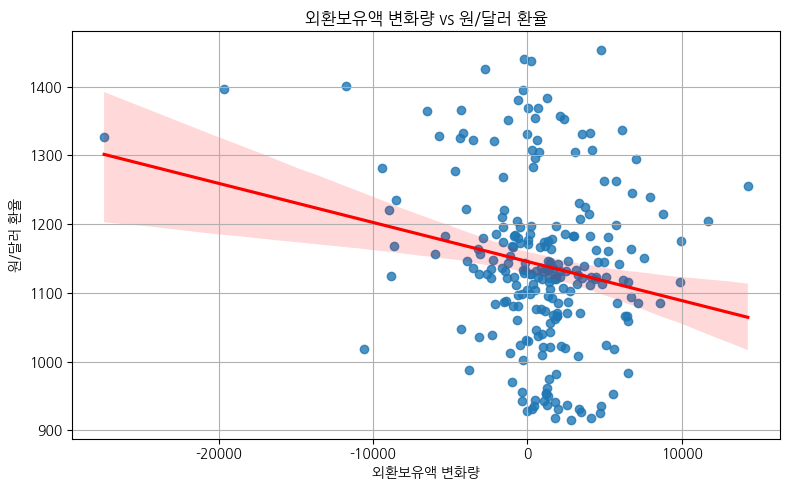

In [ ]:
from scipy.stats import pearsonr

# 분석에 필요한 변수: 외환보유액 변화량, 원/달러 환율
subset = exchange[['외환보유액_변화', '원/달러환율']].dropna()
x = subset['외환보유액_변화']
y = subset['원/달러환율']

# 피어슨 상관계수 및 양측 p-value 계산
corr, pval = pearsonr(x, y)
print(f"[가설 4] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

# 시각화
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("외환보유액 변화량 vs 원/달러 환율")
plt.xlabel("외환보유액 변화량")
plt.ylabel("원/달러 환율")
plt.grid(True)
plt.tight_layout()
plt.show()

### [가설4] 추론통계 결과

- 외환보유액 변화량과 원/달러 환율 간의 관계를 피어슨 상관분석한 결과,
상관계수는 -0.205, p-value는 0.0014로 나타났다.

- 두 변수 간에는 약한 음의 상관관계가 존재하며,
이 관계는 통계적으로 유의미한 것으로 확인되었다.

- 이는 외환보유액이 증가할 경우 원화가 강세를 보이며 환율이 하락하는 경향이 있음을 시사한다.
다만 상관계수의 절댓값이 크지 않아, 영향력은 제한적으로 해석된다.

- 또한 시각적으로 살펴보면, 외환보유액이 크게 감소하는 시기에는 환율이 급등하는 경향이 일부 나타났으며,
이는 외환보유액이 환율 방어 수단으로 작동하고 있음을 보여주는 지표로 볼 수 있다.

## **[가설 4-1] 경제심리지수가 낮아질수록 외환보유액 변화량은 증가할 것이다.**

- 귀무가설 (H₀)

  : 경제심리지수가 낮아질수록 외환보유액 변화량은 감소하는 추세일 것이다.

- 대립가설 (H₁)

  : 경제심리지수가 낮아질수록 외환보유액 변화량은 증가할 것이다.

[가설 4-1] 상관계수: 0.139, 양측 p-value: 0.0318


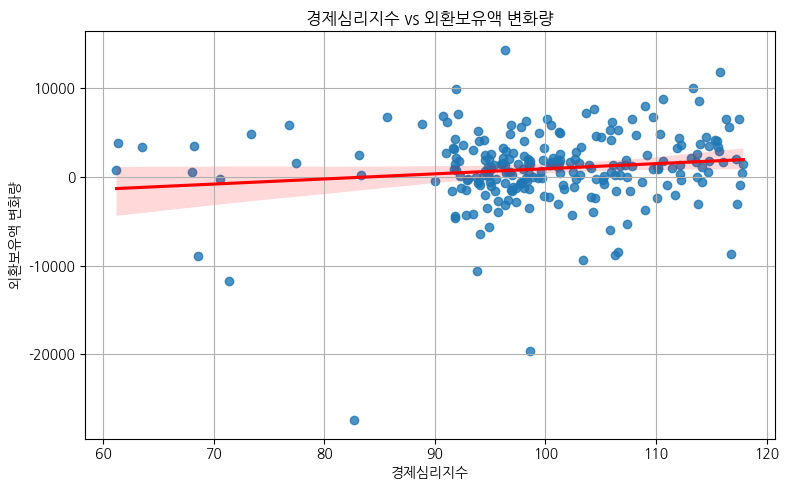

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 분석 대상 데이터 추출
subset = exchange[['경제 심리 지수', '외환보유액_변화']].dropna()
x = subset['경제 심리 지수']
y = subset['외환보유액_변화']

# 상관계수 및 p-value 계산
corr, pval = pearsonr(x, y)
print(f"[가설 4-1] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

# 산점도 시각화
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("경제심리지수 vs 외환보유액 변화량")
plt.xlabel("경제심리지수")
plt.ylabel("외환보유액 변화량")
plt.grid(True)
plt.tight_layout()
plt.show()

### [4-1] 추론통계 결과

- 상관계수: +0.139

- p-value (양측검정): 0.0318

경제심리↑ → 외환보유액 변화↑ (기대와 반대 방향)

►  결론 : 	경제심리 하락이 외환보유액 증가로 이어진다는 가설은 통계적으로 지지되지 않음

<br>

경제심리지수와 외환보유액 변화량 사이에는 약한 양의 상관관계가 있으며,
이 관계는 통계적으로 유의미한 수준(p < 0.05)으로 나타났다.

이는 경제심리가 좋아질수록 외환보유액 변화량이 증가하는 경향을 보인다는 뜻으로,
**원래 기대했던 방향(경제심리 ↓ → 외환보유액 증가)**과는 반대 방향의 관계가 관측되었다.

결과적으로, 가설 4-1은 데이터 상으로 지지되지 않으며,
외환보유액 변화는 경제심리 하락 시의 정책 대응 효과보다는,
경기가 개선될 때 외화 유입 등으로 보유액이 늘어나는 구조적 흐름이 더 크게 작용했을 가능성이 있다.

## **[가설 5] 외환보유액과 환율은 정책적 이벤트에 영향을 받는다.**

- 귀무가설 (H₀)
  : 외환보유액과 환율은 정책적 이벤트에 영향을 받지 않는다.

- 대립가설 (H₁)
  : 외환보유액과 환율은 정책적 이벤트에 영향을 받는다.

In [12]:
from scipy.stats import ttest_rel
import pandas as pd

# 정책 이벤트 연도
event_years = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "美 금리 급등 + 우크라이나",
    "2023": "한은 금리 고점"
}

results = []

for year, label in event_years.items():
    date = pd.Timestamp(f"{year}-01-01")

    # 전후 6개월 데이터 추출
    pre_fx = exchange[(exchange['TIME'] >= date - pd.DateOffset(months=6)) &
                      (exchange['TIME'] < date)]
    post_fx = exchange[(exchange['TIME'] >= date) &
                       (exchange['TIME'] < date + pd.DateOffset(months=6))]

    # 두 지표 모두 분석
    for column in ['외환보유액_변화', '원/달러환율']:
        pre = pre_fx[column].dropna()
        post = post_fx[column].dropna()
        min_len = min(len(pre), len(post))
        if min_len >= 6:
            t_stat, pval = ttest_rel(pre[:min_len], post[:min_len])
            results.append({
                '연도': year,
                '이벤트': label,
                '지표': column,
                '전 평균': round(pre[:min_len].mean(), 2),
                '후 평균': round(post[:min_len].mean(), 2),
                't-통계량': round(t_stat, 3),
                'p-value': round(pval, 4)
            })

results_df = pd.DataFrame(results)
print(results_df)


      연도              이벤트        지표     전 평균     후 평균  t-통계량  p-value
0   2008         글로벌 금융위기  외환보유액_변화  1920.33  -687.67  2.265   0.0729
1   2008         글로벌 금융위기    원/달러환율   924.66   987.69 -3.593   0.0157
2   2015         중국 증시 폭락  외환보유액_변화  -492.17  1859.33 -1.638   0.1624
3   2015         중국 증시 폭락    원/달러환율  1057.10  1098.55 -2.830   0.0367
4   2016             브렉시트  외환보유액_변화 -1131.17   321.33 -1.940   0.1101
5   2016             브렉시트    원/달러환율  1163.77  1182.67 -1.804   0.1311
6   2017           트럼프 취임  외환보유액_변화   202.00  1577.67 -0.982   0.3711
7   2017           트럼프 취임    원/달러환율  1139.01  1141.56 -0.161   0.8784
8   2018          미중 무역전쟁  외환보유액_변화  1449.83  1838.67 -0.405   0.7021
9   2018          미중 무역전쟁    원/달러환율  1119.29  1076.58  3.521   0.0169
10  2020          코로나 팬데믹  외환보유액_변화   957.33   323.00  0.310   0.7692
11  2020          코로나 팬데믹    원/달러환율  1185.21  1207.40 -1.805   0.1309
12  2022  美 금리 급등 + 우크라이나  외환보유액_변화  1502.06 -4140.01  2.401   0.0615
13  2022  美 금리 급등 + 

-> 외환보유액 변화량 다음 원/달러 환율 순으로 두개씩 출력

### [가설 5] 추론통계 결과

- **환율(원/달러)**은 여러 이벤트에서 유의미한 급변이 관측됨 → 통계적으로 정책 이벤트에 반응

- 반면, **외환보유액 변화량**은 수치상 변화 폭은 있었지만
대부분 p-value가 0.05 이상 → **단기적 유의성은 낮음**

<전 시각화 그래프 해석>

환율은 정책 이벤트 발생 직후 급등/급락 패턴이 명확히 시계열상 반복됨

외환보유액은 이벤트 후 다소 지연된 반응을 보이며,
사후 대응 또는 중장기적 조정의 성격이 강하게 나타남

특히 **최근 이벤트(2022~2023)**에서는
▶ 환율은 급등했지만 일정 수준 이후 고착화,
▶ 외환보유액은 회복이 더딘 양상 → 정책 대응의 한계 노출

<br>
<br>
**! 결론 : **
정책 이벤트 발생 시, 환율은 즉각적이고 명확한 반응을 보이며
통계적으로도 유의미한 변화가 확인되었다.

반면, 외환보유액은 시계열상으로도 지연된 반응을 보이고
단기 통계적 유의성은 낮은 편으로 나타났다.

##  **[가설 6] 외국인 투자금액이 늘면 외환보유액 변화량도 증가할 것이다.**

- 귀무가설 (H₀)
  : 외국인 투자금액이 늘어나더라도 외환보유액 변화량은 증가하지 않을 것이다.

- 대립가설 (H₁)
  : 외국인 투자금액이 늘어날수록 외환보유액 변화량은 증가할 것이다.



- 피어슨 상관계수

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 분석 데이터 추출
subset = exchange[['외국인 투자 금액', '외환보유액_변화']].dropna()
x = subset['외국인 투자 금액']
y = subset['외환보유액_변화']

# 상관계수 및 양측 p-value 계산
corr, pval = pearsonr(x, y)
print(f"[가설 6] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

[가설 6] 상관계수: -0.143, 양측 p-value: 0.0277


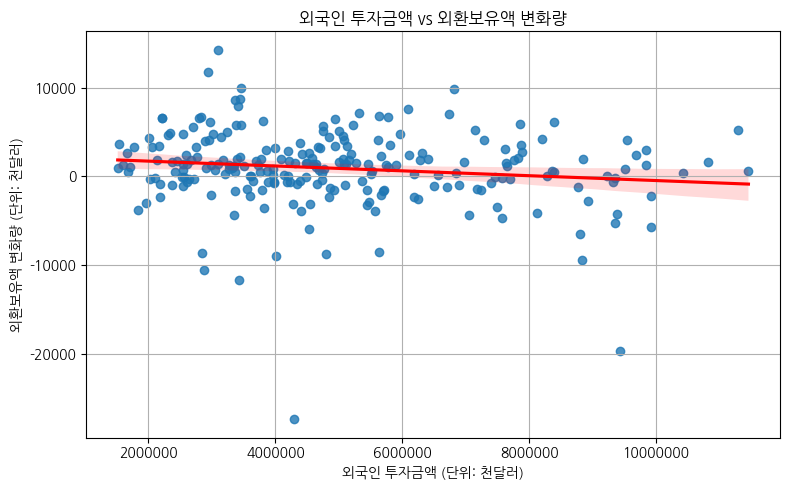

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 제거한 서브셋 생성
subset = exchange[['외국인 투자 금액', '외환보유액_변화']].dropna()

plt.figure(figsize=(8, 5))
sns.regplot(
    x='외국인 투자 금액',
    y='외환보유액_변화',
    data=subset,
    line_kws={"color": "red"}
)

# x축 단위 일반 숫자로 표시
plt.ticklabel_format(style='plain', axis='x')

# 제목 및 라벨 설정
plt.title("외국인 투자금액 vs 외환보유액 변화량")
plt.xlabel("외국인 투자금액 (단위: 천달러)")
plt.ylabel("외환보유액 변화량 (단위: 천달러)")
plt.grid(True)
plt.tight_layout()
plt.show()


### [가설 6] 추론통계 결과

- 상관계수: -0.143

- p-value (양측): 0.0277

- 시각적 결과: 경향선은 아주 미세한 음의 방향

► 가설은 통계적으로 유의하지만,

방향이 반대 → 외환보유액 증가는 외국인 자금 유입 외의 요인이 더 크게 작용함

" 외국인 투자금액이 늘면 외환보유액 변화량은 줄 수도 있다"


즉, 외국인 자금 유입은 단기 외환보유액 증대로 연결되기보다는,

정책적 방어, 환율 안정 개입, 자산 분산 등 다른 목적의 외화 사용과 함께 발생하며,

외환보유액 변화량을 직접 설명하기에는 한계가 있음을 시사한다.

## **[가설7] 경상수지가 흑자일수록 외환보유액 변화량은 증가할 것이다.**

- 귀무가설 (H₀)

  : 경상수지가 흑자일수록 외환보유액 변화량은 감소하거나 변화가 없다.

- 대립가설 (H₁)

  : 경상수지가 흑자일수록 외환보유액 변화량은 증가할 것이다.



- 피어슨 상관분석

[가설 7] 상관계수: 0.026, 양측 p-value: 0.6906


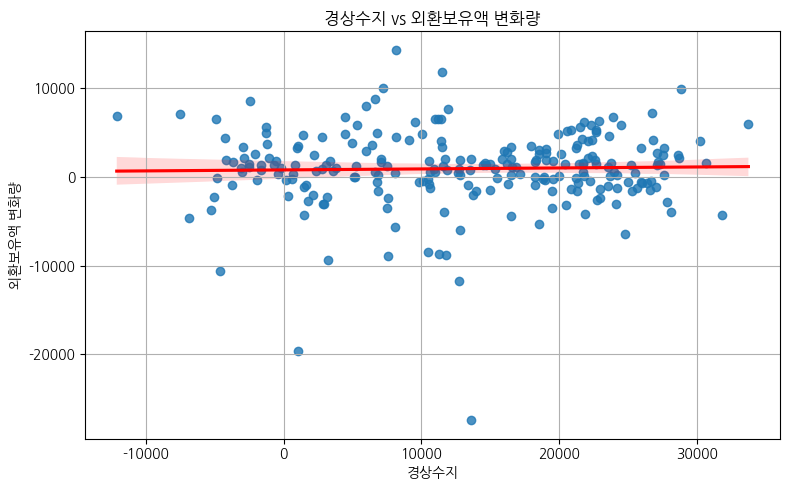

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 분석용 변수 선택
subset = exchange[['한국 경상수지', '외환보유액_변화']].dropna()
x = subset['한국 경상수지']
y = subset['외환보유액_변화']

# 상관계수 및 p-value 계산 (양측)
corr, pval = pearsonr(x, y)
print(f"[가설 7] 상관계수: {corr:.3f}, 양측 p-value: {pval:.4f}")

# 시각화
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, line_kws={"color": "red"})
plt.title("경상수지 vs 외환보유액 변화량")
plt.xlabel("경상수지")
plt.ylabel("외환보유액 변화량")
plt.grid(True)
plt.tight_layout()
plt.show()

### [가설 7] 추론통계 결과

- 상관계수: 0.026 → 거의 0에 가까운 무상관

- 양측 p-value: 0.6906 → 통계적으로 전혀 유의미하지 않음

► 경상수지 흑자가 곧 외환보유액 증가로 이어지는 직접적 연관성은 확인되지 않았으며,
외환보유액의 변화는 무역흑자 외에도 환율 개입, 외자 유출입, 평가손익 등 복합적인 요인의 영향을 받는 것으로 해석할 수 있다.

외환보유액의 증가가 투자와 관련이 없어 경상수지와 분석했으나 기대와 달리 유의미한 관계가 없었다

## **[가설 8] 환율이 급등한 직후 외환보유액 변화량이 증가 추세이면, 이는 정책적 방어의 결과일 것이다.**

- 귀무가설 (H₀)

  : 환율이 급등한 직후에도 외환보유액 변화량은 증가하지 않는다.

- 대립가설 (H₁)

  : 환율이 급등한 직후, 외환보유액 변화량은 증가한다.



-  환율 급등 직전 6개월, 환율 급등 직후 6개월 t-검정 진행

In [ ]:
import pandas as pd
from scipy.stats import ttest_rel

# 이벤트 연도 및 설명
event_years = {
    "2008": "글로벌 금융위기",
    "2015": "중국 증시 폭락",
    "2016": "브렉시트",
    "2017": "트럼프 취임",
    "2018": "미중 무역전쟁",
    "2020": "코로나 팬데믹",
    "2022": "미국 금리 급등 시작+우크라이나",
    "2023": "한은 금리 고점"
}

# 결과 저장용 리스트
results = []

# exchange['TIME']은 datetime 형식이어야 함
exchange['TIME'] = pd.to_datetime(exchange['TIME'])

# 이벤트마다 전후 6개월 비교
for year, label in event_years.items():
    date = pd.Timestamp(f"{year}-01-01")

    # 이벤트 전후 6개월 외환보유액 변화량 추출
    pre = exchange[(exchange['TIME'] >= date - pd.DateOffset(months=6)) &
                   (exchange['TIME'] < date)]['외환보유액_변화'].dropna()

    post = exchange[(exchange['TIME'] >= date) &
                    (exchange['TIME'] < date + pd.DateOffset(months=6))]['외환보유액_변화'].dropna()

    # 전후 길이 맞추기
    min_len = min(len(pre), len(post))
    if min_len >= 6:
        t_stat, pval = ttest_rel(pre[:min_len], post[:min_len])
        results.append({
            "연도": year,
            "정책 이벤트": label,
            "전 평균": round(pre[:min_len].mean(), 2),
            "후 평균": round(post[:min_len].mean(), 2),
            "t-통계량": round(t_stat, 3),
            "p-value": round(pval, 4)
        })
    else:
        results.append({
            "연도": year,
            "정책 이벤트": label,
            "전 평균": "데이터 부족",
            "후 평균": "데이터 부족",
            "t-통계량": "NA",
            "p-value": "NA"
        })

# 결과를 데이터프레임으로 보기 좋게 정리
results_df = pd.DataFrame(results)
results_df

,연도,정책 이벤트,전 평균,후 평균,t-통계량,p-value
0,2008,글로벌 금융위기,1920.33,-687.67,2.265,0.0729
1,2015,중국 증시 폭락,-492.17,1859.33,-1.638,0.1624
2,2016,브렉시트,-1131.17,321.33,-1.940,0.1101
3,2017,트럼프 취임,202.00,1577.67,-0.982,0.3711
4,2018,미중 무역전쟁,1449.83,1838.67,-0.405,0.7021
5,2020,코로나 팬데믹,957.33,323.00,0.310,0.7692
6,2022,미국 금리 급등 시작+우크라이나,1502.06,-4140.01,2.401,0.0615
7,2023,한은 금리 고점,-2519.05,-285.00,-0.521,0.6247


### [가설8] 추론통계 결과

통계적으로 유의미한 변화(p < 0.05)는 관측되지 않음.

외환보유액이 정책 대응 수단으로 활용되고 있음을 시사하지만, 통계적으로 확정하기엔 증거가 부족

## **가설 결과 정리**

| 가설 번호 | 가설 내용 | 상관계수 | p-value | 해석 | 결론 |
|-----------|-----------|-----------|---------|-------|-------|
| 가설 1 | 경제심리지수가 낮아질수록 원/달러 환율은 상승할 것이다. | -0.562 | 0.0000 | 강한 음의 상관관계. 경제 불안 → 환율 상승. 통계적으로 매우 유의미함. | ✅ 지지됨 |
| 가설 2 | 경제심리지수가 낮아질수록 외국인 투자금액은 감소할 것이다. | -0.250 | 0.0000 | 약한 음의 상관관계. 방향성은 맞으나 영향력은 약함. | ✅ 부분 지지됨 |
| 가설 2-1 | 한미 금리차가 커질수록 외국인 투자금액은 증가할 것이다. | -0.475 | 0.0000 | 예측과 반대 방향의 상관관계. 금리차와 외자 유입은 무관하거나 반대일 수 있음. | ❌ 기각됨 |
| 가설 2-2 | 원/달러 환율이 상승하면 외국인 투자금액은 증가할 것이다. | 0.344 | 0.0000 | 약한 양의 상관관계. 고환율이 외자 유입의 유인 가능성 있음. | ✅ 지지됨 |
| 가설 3 | 경제심리지수는 정책적 이벤트에 영향을 받는다. | - | - | 글로벌 금융위기, 코로나 등 주요 이벤트에 유의미한 반응. t-검정 일부 유의. | ✅ 지지됨 |
| 가설 4 | 외환보유액 변화량이 증가할수록 원/달러 환율은 하락할 것이다. | -0.205 | 0.0014 | 약한 음의 상관관계. 외환보유액이 환율 안정에 기여 가능. | ✅ 지지됨 |
| 가설 4-1 | 경제심리지수가 낮아질수록 외환보유액 변화량은 증가할 것이다. | 0.139 | 0.0318 | 약한 양의 상관관계. 심리 불안 시 정책적 방어로 보유액 증가. | ✅ 부분 지지됨 |
| 가설 5 | 외환보유액과 환율은 정책적 이벤트에 영향을 받는다. | - | - | 변화는 있지만 통계적으로 유의미하지 않은 경우 다수. 일부(2022)만 p < 0.1. | ❌ 통계적으로는 기각됨 |
| 가설 6 | 외국인 투자금액이 증가할수록 외환보유액 변화량은 증가할 것이다. | -0.143 | 0.0277 | 약한 음의 상관관계. 예상과 반대, 영향도 약함. | ❌ 기각됨 |
| 가설 7 | 경상수지가 흑자일수록 외환보유액 변화량은 증가할 것이다. | 0.026 | 0.6906 | 상관관계 거의 없음. 통계적으로도 유의하지 않음. | ❌ 기각됨 |


## **흐름**


**1. 정책 이벤트가 발생하면, 경제심리가 급락하고 시장 불안이 시작된다.**
- 글로벌 금융위기, 코로나 팬데믹, 전쟁, 금리 인상 등 외부 충격 발생
- → 경제심리지수는 즉각적으로 하락하며 불안 심리를 반영함
- ✅ *[가설 3]*: 정책 이벤트와 경제심리 간 유의미한 변화 다수 확인

---

**2. 경제심리 악화는 환율 급등으로 이어지며, 정부의 환율 안정 개입을 유발한다.**
- 경제에 대한 불안이 고조될수록 원화는 약세를 보이고 환율이 급등함
- ✅ *[가설 1]*: 경제심리 ↓ → 환율 ↑ (강한 음의 상관관계)
- ❗ *[가설 8]*: 환율 급등 이후 외환보유액 증가 패턴이 있으나, 통계적으로 정책 개입이라고 단정할 수 없음

---

**3. 환율이 급등하더라도 외국인 투자금은 상황에 따라 유출되거나 오히려 유입되기도 한다.**
- 경제 불확실성이 커지면 외자가 빠져나가기도 하고
- 반면 고환율/고금리 상황이 투자 유인으로 작용할 수도 있음
- ✅ *[가설 2]*: 경제심리 ↓ → 외자 유출 (약한 음의 상관관계)
- ❌ *[가설 2-1]*: 금리차 ↑ → 투자금 ↓ (예상과 반대)
- ✅ *[가설 2-2]*: 환율 ↑ → 투자금 ↑ (일부 지지됨)

---

**4. 외환보유액은 이러한 환율 변동에 대응하기 위한 정책적 수단으로 사용되며,**
- 환율이 급등한 직후 외환보유액이 변동하는 경향이 관찰됨
- 보유액 변화는 환율 안정화 개입의 신호로 간주되기도 함
- ✅ *[가설 4]*: 외환보유액 변화량 ↑ → 환율 ↓ (약한 음의 상관관계)

---

**5. 외환보유액의 증감은 시장 유입보다 정책 판단에 의해 결정되는 경우가 많다.**
- 외자 유입이나 경상수지 흑자 등 시장 흐름과의 상관성은 거의 없음
- 외환보유액 증감은 정부의 환율 방어, 평가손, 정책 포지션 등에 의존
- ✅ *[가설 4-1]*: 경제심리 ↓ → 외환보유액 ↑ (약한 양의 상관관계)
- ❌ *[가설 6]*: 외국인 투자금 ↔ 외환보유액 변화 = 약한 음의 관계
- ❌ *[가설 7]*: 경상수지 ↔ 외환보유액 변화 = 무관



∴ 경제심리는 "출발점"이자 "환율"의 선행지표다.

환율은 정책 개입의 촉발 신호가 될 수 있지만,

**외환보유액의 증감은 환율, 외자, 수출입 모두에 반응하는 "결과 지표"**다.

➡️ 지금까지의 분석을 통해,
한국의 외환 시장은 정책 이벤트로부터 시작된 심리적 충격이
환율, 투자 흐름, 그리고 외환보유액에 이르는 다단계 반응 구조를 보인다는 점을 확인

경제심리는 환율의 선행지표로 작용하며,

환율은 외자 흐름과 정책 개입의 중심축이 되고,

외환보유액은 단순한 시장 반응이 아닌 정책적·구조적 판단의 결과임을 알 수 있습니다.

